<a href="https://colab.research.google.com/github/ryskks/usedicom/blob/main/window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Windoe Level / Width を調節する

まずは Googl Drive をマウントして，画像を読み込める状態にする

In [1]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 必要なパッケージのインストール
!pip install pydicom
!pip install matplotlib
!pip install -U python-gdcm
!pip install pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 必要モジュールの導入
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

変数変数 `DIR` に DICOM ファイルまでのパスを示します

In [4]:
# DICOM ファイルの読み込み
DIR = "/content/drive/MyDrive/Colab Notebooks/DICOM/ct2.dcm"
d = pydicom.read_file(DIR)

通常通り画像を表示させますが，
頭蓋骨ははっきりと観察できるのに対して，頭蓋内は観察できません．

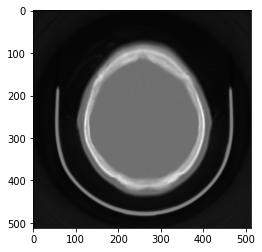

In [59]:
# 画像データを変数に代入
img = d.pixel_array

# 画像表示
plt.imshow(img, cmap='gray')
plt.show()

Python で画像表示した場合 CT 値の最大値から最小値の間で 256 分割され，グレイスケールに変換されます．なので，そのままではのっぺりした画像となります．

通常，表現したい CT 値の領域を WW として指定し，その中心を WL として指定してあげるわけですが ，Python では、最小の CT 値と最大の CT を指定します．

`vmin =`

で最小の CT 値を指定し

`vmax =`

で最大の CT 値を指定してあげることで．好みの条件にて表示することが可能となります．

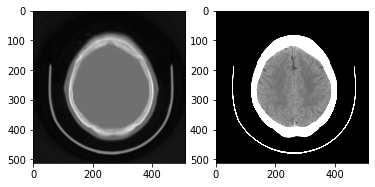

In [65]:
# 画像データを変数に代入
img = d.pixel_array

# ウィンドウ処理
# 上の plt.imshow(img, cmap='gray')
# に対して，vmax, vmin を追加 

min = 0
max = 70

plt.subplot (1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot (1, 2, 2)
plt.imshow(img, cmap='gray', vmin=min, vmax=max)
plt.show()

どうでしょうか．頭蓋内が確認できるようになったでしょうか．
頭蓋骨骨折を観察したい場合や，脳内出血や腫瘍を見たい場合で，WW/WL を変更する必要性が
あることがよく理解できたでしょう．

また，DICOM ファイルの情報から以下のようにして，WW/WL を調節することも可能です．

wc : 50 ww : 75


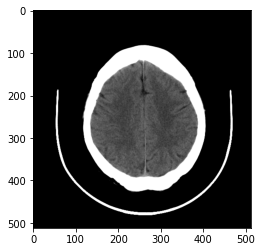

In [66]:
# 画像データを変数に代入
img = d.pixel_array

# ウィンドウレベルと幅の情報を DICOM から取得
wc = d.WindowCenter
ww = d.WindowWidth
print("wc :", wc, "ww :", ww)

#ウィンドウ処理
max = wc + ww /2
min = wc - ww /2
img = 255 * (img - min) / (max - min)
img[img > 255] = 255
img[img < 0] = 0
plt.imshow(img, cmap='gray')
plt.show()

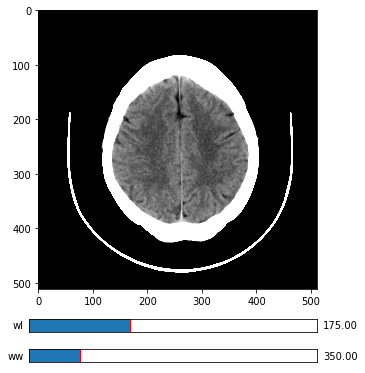

In [68]:
from matplotlib.widgets import Slider

# 画像データを変数に代入
img = d.pixel_array

min = 20
max = 60

#画像、スライダを表示する領域の設定
fig = plt.figure(figsize=(5, 6))  

img = plt.imshow(img, cmap='gray', vmin = min, vmax = max)

# ww、wlのスライダを表示する位置の設定 
wl_slider_pos = plt.axes([0.1, 0.08, 0.8, 0.03])
ww_slider_pos = plt.axes([0.1, 0.01, 0.8, 0.03])

# ww、wlのスライダのインスタンスを作成
wl_slider = Slider(wl_slider_pos, 'wl', 0, 500, valinit=175)
ww_slider = Slider(ww_slider_pos, 'ww', 0, 2000, valinit=350)
 
#スライダを動かしたときの処理
def update(slider_val): 
    # ww、wlのスライダの値を取得
    ww = ww_slider.val
    wl = wl_slider.val 

    # wwの上限値と下限値を計算
    low = int(wl - ww/2)
    high = int(wl + ww/2) 

    # 画像表示の設定imgのlow,highの値を更新
    img.set_clim([low, high]) 

    # 表示している画像を更新
    fig.canvas.update() 
 
# スライダーを動かしたときの処理を指定
wl_slider.on_changed(update)
ww_slider.on_changed(update) 

plt.show()